### 2.3.8 ニューラルネットワーク（ディープラーニング）

ニューラルネットワークというアルゴリズムが、最近「ディープラーニング」という名前で再度注目を集めている。ディープラーニングは、多くの機械学種アプリケーションに対して期待できる結果を示しているが、ディープラーニングアルゴリズムの多くは特定のアプリケーションに向けて注意深く作られたものだ。ここでは、比較的簡単な**多層パーセプトロン**（multilayer perceptron：MLP）によるクラス分類と回帰についてあけ議論する。これらは、より複雑なディープラーニングを理解する上で、良い入口になるはずだ。多層パーセプトロンは、フィードフォワード・ニューラルネットワークもしくはただニューラルネットワークと呼ばれる。

#### 2.3.8.1 ニューラルネットワークモデル

MLPは線形モデルを一般化し、決定までに複数のステージで計算するものと見ることができる。線形回帰では予測を次の式で行うことを思い出そう。

$$\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$$

普通の言葉で言い換えると、$\hat{y}$は、入力特徴量$x[0]$から$x[p]$までの重み付き和で、重みは学習された係数$w[0]$から$w[p]$まで与えられる。これを図示すると**図2-44**のようになる。

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

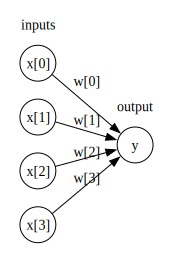

In [20]:
display(mglearn.plots.plot_logistic_regression_graph())

**図2-44 線形回帰を図示したもの。入力特徴量と予測がノードとして与えられており、係数がノードを結んでいる。**

ここで、左側のノード軍は入力特徴量を表し、接続している線が学習された係数を、右側のノードが出力を表す。出力は、入力に対する重み付き和になっている。

MLPではこの重み付き和の計算が繰り返し行われる。まず中間処理ステップを表す**隠れユニット**（hidden units）の計算で重み付き和が行われ、次に、この隠れユニットの値に対して重み付き和が行われて、最後の結果が算出される。（**図2-39**）。

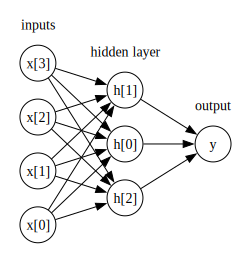

In [21]:
display(mglearn.plots.plot_single_hidden_layer_graph())

**図2-45 一層の隠れ層を持つ多層パーセプトロン**

このモデルには学習しなければならない係数（重みとも呼ばれる）がたくさんある。すべての入力ノードと（隠れ層を構成する）すべての隠れユニットの間に１つずつあり、すべての隠れ層のユニットと出力ノードの間にも１つずつある。

一連の重み付き和を計算することは、数gカウ的には１つの重み付き和を計算することと同じなので、このモデルを線形モデルよりも強力にするためには、もう少し仕掛けを加える必要がある。個々の隠れユニットの重み付き和を計算したら、その結果に対して非線形関数を適用するのだ。多くの場合、relu(rectified linear unit：正規化線形関数)やtanh(hyperbolic tangent：双曲正接関数)が用いられる。この関数の結果が出力$\hat{y}$のために重み付き和に用いられる。これらの関数を図2-48に示す。reluは、ゼロ以下の値を切り捨てている。tanhは小さい値に対しては-1に、大きい値に対しては+1に飽和する。いずれの非線形関数も、ニューラルネットワークが線形モデルよりもはるかに複雑な関数を学習することを可能にする。

Text(0, 0.5, 'relu(x), tanh(x)')

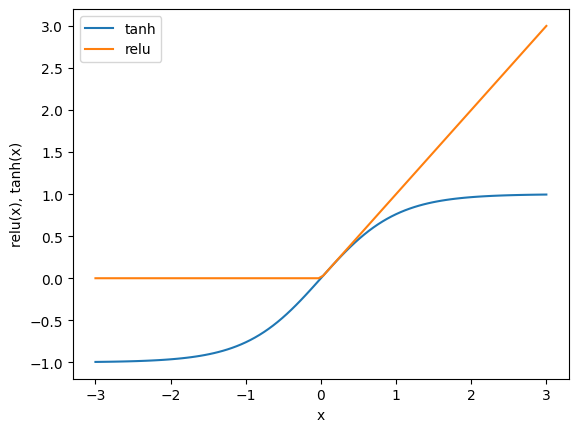

In [22]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

**図2-46 活性化関数tanh（双曲正接関数/ハイパボリックタンジェント）とrelu（正規化線形関数）**

**図2-46**に示した小さいニューラルネットワークで回帰を行う場合の$\hat{y}$を計算する式は次のようになる。（tanhを非線形関数に使う場合）。

$$h[0] = tanh(w[0,0] \times x[0] + w[1,0] \times x[1] + w[2,0] \times x[2]+ w[3,0] \times x[3] + b[0])\\
h[1] = tanh(w[0,1] \times x[0] + w[1,1] \times x[1] + w[2,1] \times x[2]+ w[3,1] \times x[3] + b[1])\\
h[0] = tanh(w[0,2] \times x[0] + w[1,2] \times x[1] + w[2,2] \times x[2]+ w[3,2] \times x[3] + b[2])\\
\hat{y} = v[0] \times h[0] + v[a] \times w[1] + v[2] \times w[2]+ b$$



ここで、$w$は入力$x$と隠れ層$h$の間の重み、$v$は隠れ層$h$と出力$\hat{y}$の重みである。$v$と$w$はデータから学習される重みで、$x$は入力特徴量、$\hat{y}$は計算された結果で、$h$は計算の途中結果である。ユーザが設定するべき重要なパラメータとして、隠れ層のノード数がある。これは、小さくて単純なデータセットでは10くらいだが、非常に複雑なデータでは10,000にもなる。さらに、**図2-47**のように隠れ層を追加することもできる。

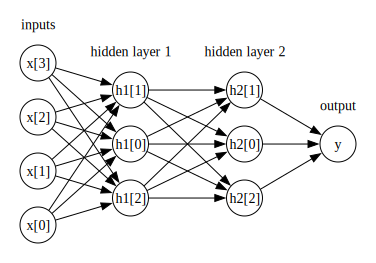

In [23]:
mglearn.plots.plot_two_hidden_layer_graph()

**図2-47 ２層の隠れ層を持つ多層パーセプトロン**

このような計算層をたくさん持つ大きなニューラルネットから、「ディープラーニング」という言葉が生まれた。

#### 2.3.8.2 ニューラルネットワークのチューニング

MLPClassifierを、これまでも使ってきたtwo_moonsデータセットに適用して、MLPが動く様子を見てみよう。結果を**図2-48**に示す。

Text(0, 0.5, 'Feature 1')

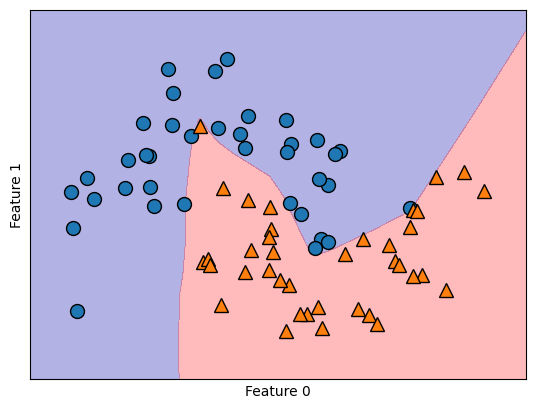

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-48 隠れ層に100ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界**

乳０らるネットワークは、全く線形ではないが、比較的滑らかな決定境界を学習している。ここではsolver='lbfgs'としているが、これについては後で議論する。

デフォルトでは、MLPは100個の隠れユニットを用いる。これはこの小さいデータセットに対しては明らかに大きすぎる。この数を減らし、モデルの複雑さを減らしても良い結果が得られる。（**図2-49**）。

c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

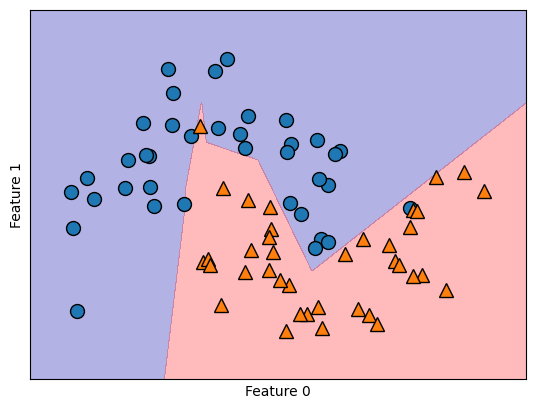

In [25]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-49 隠れ層に10ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界**

隠れ層のユニット数をたった10にすると、決定境界は少しギザギザになる。デフォルトでは、非線形化に**図2-46**に示したreluを用いる。隠れ層が１層の場合には、reluを使うと、決定曲線は10の線分から構成されることになる。決定境界をもう少し滑らかにしたければ、隠れ層のユニット数を増やす（**図2-48**のように）か、隠れ層を増やす（**図2-50**）か、非線形活性化関数にtanhjを用いればよい（**図2-51**）。

Text(0, 0.5, 'Feature 1')

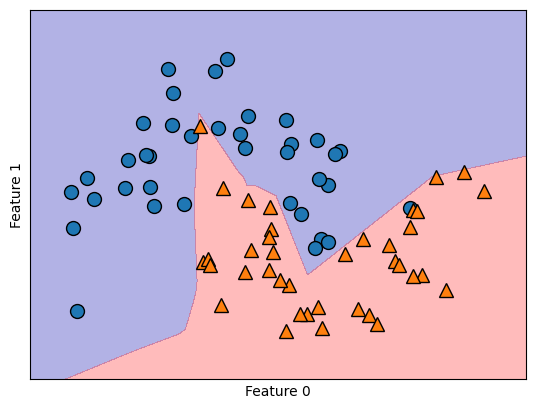

In [26]:
# それぞれ10ユニットの隠れ層を２層使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-50 10ユニット２層の隠れ層を用いたニューラルネットワークによる決定境界。活性化関数はrelu。**

Text(0, 0.5, 'Feature 1')

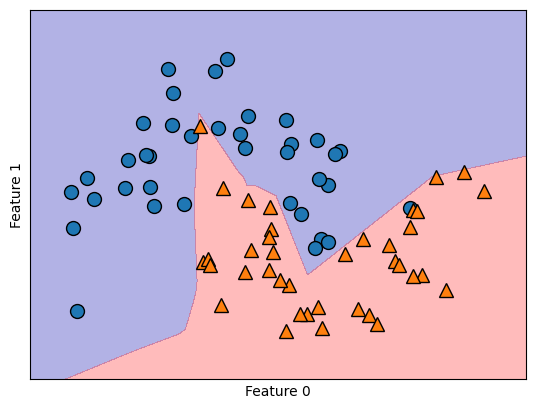

In [27]:
# それぞれ10ユニットの隠れ層を２層使う。さらに非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-51 10ユニット２層の隠れ層を用いたニューラルネットワークによる決定境界。活性化関数はtanh。**

さらに、ニューラルネットワークの複雑さを、リッジ回帰やクラス分類器で行ったのと同様に、12ペナルティで重みを0に近づけることで、制御することができる。MLPClasifierでは、このパラメータは（線形回帰モデルと同じ）alphaで、デフォルトでは非常に小さい値（弱い正則化）に設定されている。**図2-52**に、10ユニットもしくは100ユニットの２層の隠れ層を持つニューラルネットを
two_moonsデータセットに適用した場合の、パラメータalphaの効果を示す。

c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


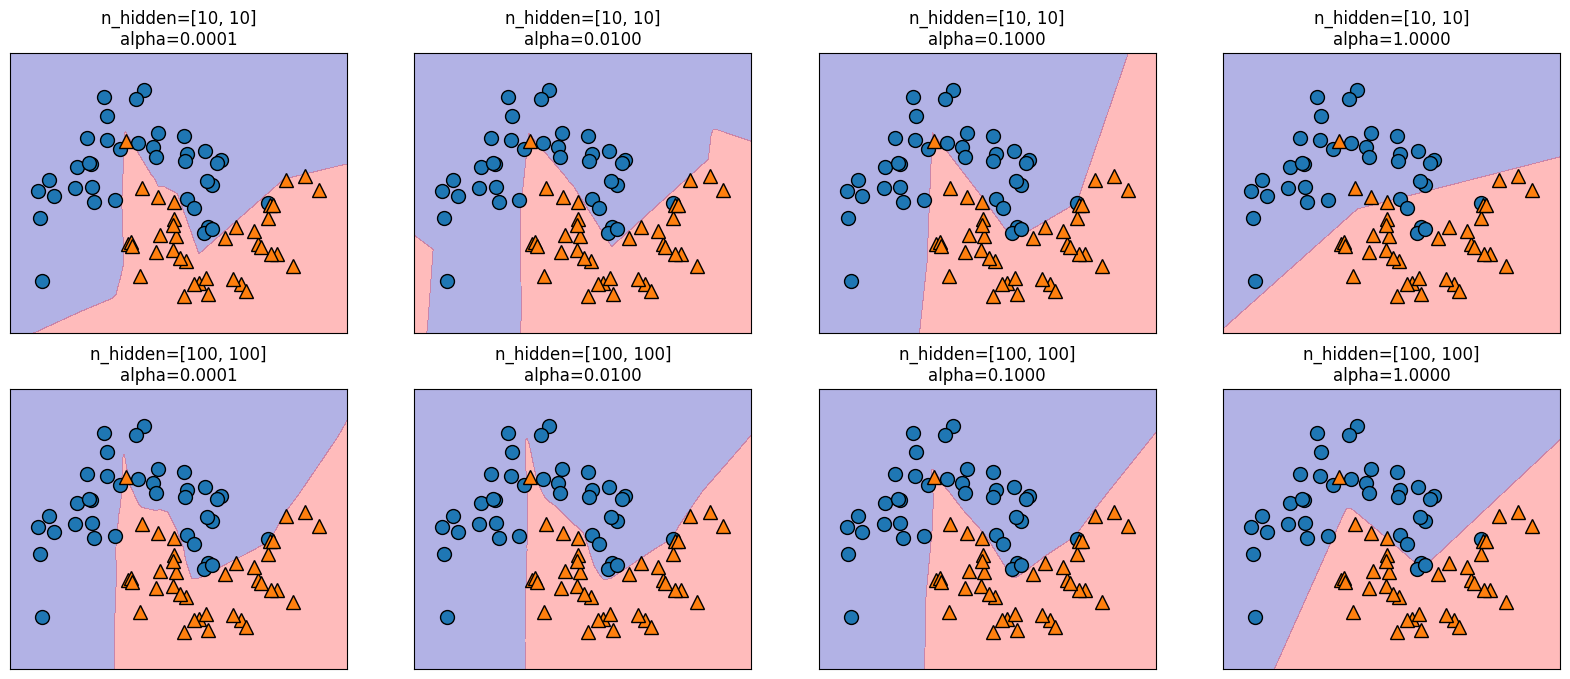

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

**図2-52 さまざまな隠れユニット数とalphaパラメータに対する決定境界**

ニューラルネットワークには複雑さを制御する方法が、隠れ層の数、隠れ層のユニット数、正則化（alpha）と、たくさんあることが理解できただろう。実際には他にもあるのだが、ここでは立ち入らない。

ニューラルネットワークには学習を開始する前に重みを乱数で割り当てる。この乱数による初期化の影響が、学習されるモデルに影響を与えることは、ニューラルネットワークの重要な性質の一つだ。

これは、まったく同じパラメータを用いても、異なる乱数シードを用いると、まったく異なったモデルが得られることを意味する。ネットワークが大きくなると、複雑さを適切に設定しさえすれば、精度にはそれほど大きい影響を与えないはずだが、（特に小さいネットワークでは）このことを留意すべきだ。図2-53に示したさまざまなモデルは、同じパラメータセットで学習したものだ。

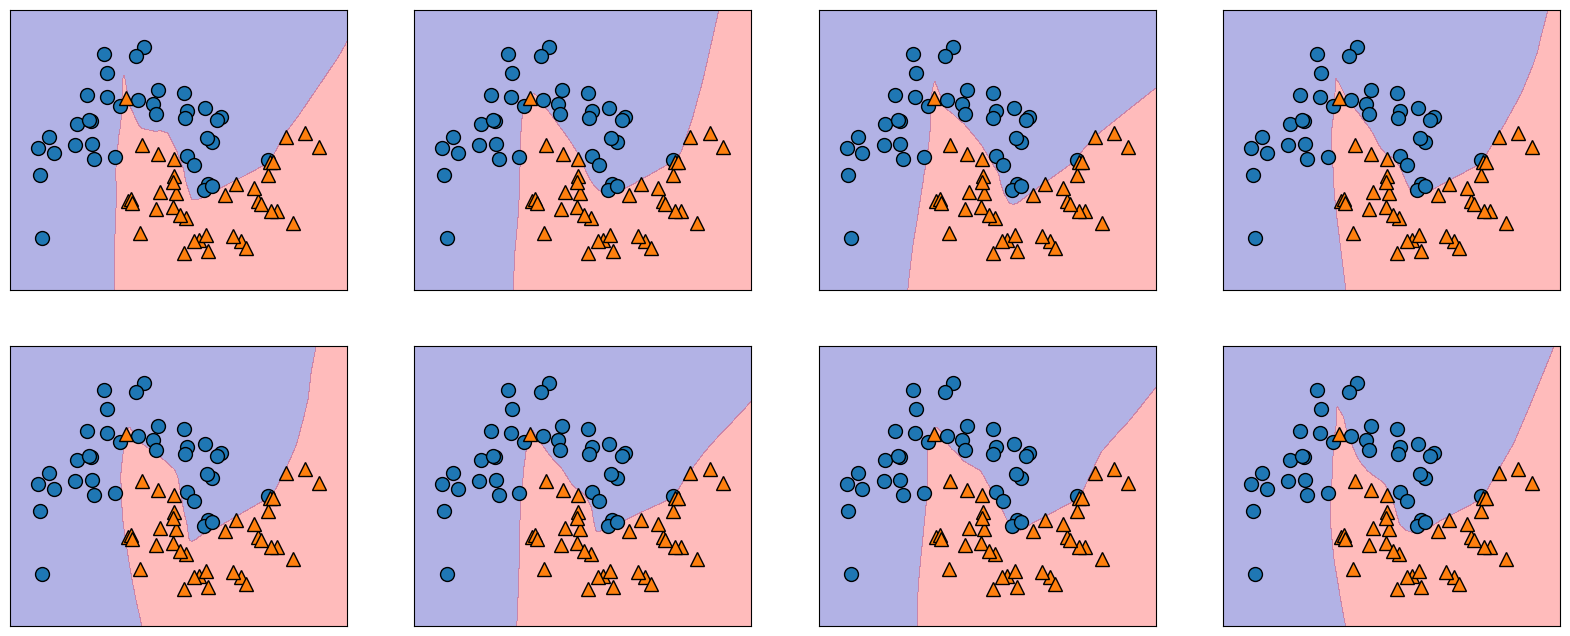

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

**図2-53 同じパラメータだが異なる乱数で初期化された状態から学習されたさまざまな決定境界**

実データに対するニューラルネットワークを理解するために、cancerデータセットに対してMLPClassifierを適用してみよう。まずは、デフォルトパラメータで試してみよう。

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


MLPの精度はかなり良いが、他のモデルほどではない。SVCの例でも見たように、これはデータのスケールの問題だ。ニューラルネットワークも、すべての入力特徴量が同じ範囲に収まっていることを仮定している。理想的には平均が0で分散が1であるのが望ましい。この条件を満たすようにデータセットをスケール変換しなければならない。ここでも、「手で」スケール変換するが、「**３章 教師無し学習と前処理**」で紹介するStandardScalerを用いれば自動でできる。

In [33]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引いてから、標準偏差で割る
# これにより、mean=0, std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 訓練セットの特徴量ごとの最小値を算出
min_on_train = X_train.min(axis=0)
# 訓練セットの特徴量ごとの範囲を算出
range_on_train = (X_train - min_on_train).max(axis=0)

# 幅を0から1にするために、最小値を引き、範囲で割る
# これにより、min=0, max=1になる
X_train_scaled = (X_train - min_on_train) / range_on_train
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_on_train) / range_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy on training set: 0.981
Accuracy on test set: 0.972


c:\Users\seiji\anaconda3\envs\machine_learning_oreilly\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


スケール変換を行うと、結果ははるかに良くなり、他のアルゴリズムに並ぶ。このモデルに対しては、学習繰り返しの回数が最大値に達したという警告が出ている。これはモデルの学習に使っているadamアルゴリズムの機能で、学習繰り返しの回数を増やすべきだと言っているのだ。

In [34]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


繰り返し回数を増やすと、訓練セットに対する精度が上がっただけで、汎化性能は上がっていない。それでも、モデルの性能はかなり高いと言える。訓練性能とテスト性能に差があるということは、モデルの複雑さを下げれば、汎化性能が上がる可能性がある問うことを意味する。ここで、少し乱暴だあがalphaパラメータを0.0001から1に上げて、重みに対する正則化を強化してみよう。

In [35]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.958


こうすると、これまでのモデルでもベストの性能が出る。

ニューラルネットワークが学習した内容を解析することは可能である、が線形モデルや決定機を用いたモデルの解析よりも難しい。何が学習されたのかを見る一つの方法は、モデル内部の重みを見てみることだ。scikit-learnサンプルギャラリーにこの例がある。あまりわかりやすいとは言えないが、cancerデータセットに対して試してみよう。図2-54は、入力と第一隠れ層をつないでいる重みが学習されたものである。この図の行は30の入力特徴量を表し、列は100の隠れユニットに相当する。明るい色が大きな正の値、暗い色が負の値である。

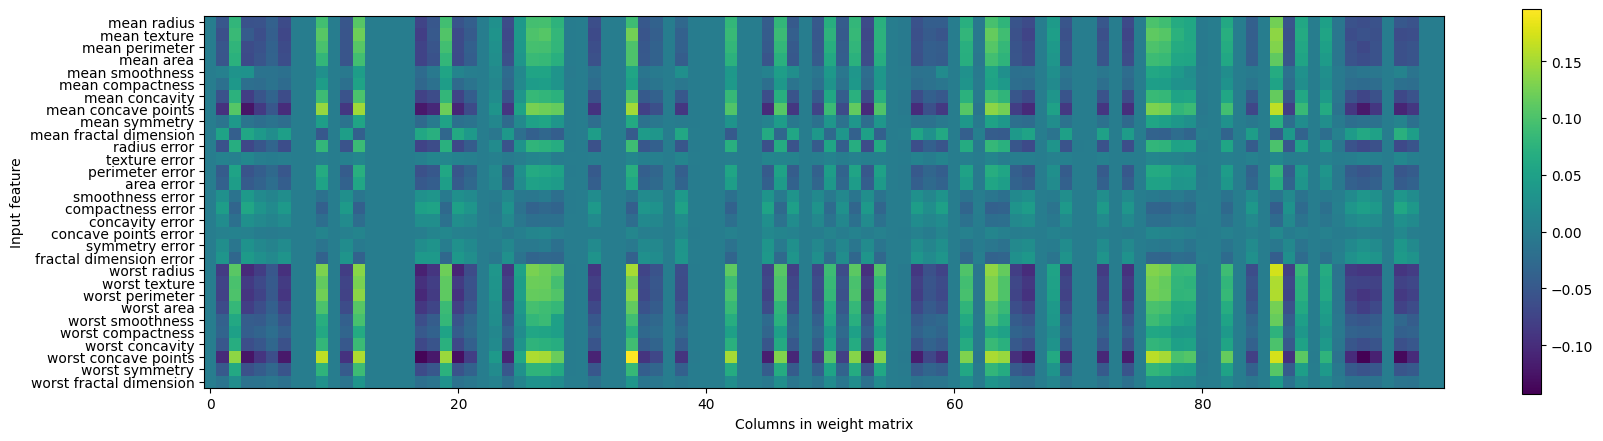

In [ ]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

**図2-54 cancerデータセットを学習したｂニューラルネットワークの第一層の重みを表したヒートマップ**

一つの推論としては、すべての隠れユニットに対して重みがとても小さい特徴量は、このモデルにとって
「重要ではない」と言えるだろう。「mean semoothness」と「mean compactness」、さらに「smoothness error」から「fractal dimention error」までの特徴量が重要でないか、または、我々がこれらの特徴量をニューラルネットワークが使えるように表現できていなかったのかのどちらかだ。

隠れ層から出力層への重みも可視化することができるが、こちらはさらにわかりにくい。MLPClassifierとMLPRegressorは、一般的なニューラルネットワークアーキテクチャを簡単なインターフェイスで利用できるようにしてくれるが、ニューラルネットワークで可能なことのごく一部しかカバーしていない。より柔軟な、もしくはより大きなモデルを使いたいなら、scikit=learnではなく、たくさんある素晴らしきディープラーニングライブラリを試すことをお勧めする。Pythonユーザであれば、最も広く使われているライブラリは、keras、lasagna、tensor-flowである。lasagnaは、theanoを用いて構築されているが、kerasはtensoir-flowとtheanoのどちらにも利用できる。これらのライブラリは、ニューラルネットワークを構築し、急速に進歩するディープラーニングの研究についていくための、はるかに柔軟なインターフェイスを提供している。人気のあるディープラーニングライブラリはどれも、高性能なGPU（グラフィック処理ユニット）を使うことができる。scikit-learnは、GPUをサポートしていない。GPUを用いると計算を10倍から100バイ高速にすることができる。これは大規模なデータセットに対してディープラーニングを用いるには本質的に重要なことだ。

#### 2.3.8.3 長所、短所、パラメータ

ニューラルネットワークは、機械学習の多くのアプリケーションにおいて、最先端のモデルとして蘇った。ニューラルネットワークの最大の利点は、大量のデータに含まれているデータを費やし、信じられないほど複雑なモデルを構築できることだ。十分な計算時間とデータをかけ、慎重にパラメータを調整すれば、他の機械学習アルゴリズムに勝てることが多い（クラス分類でも回帰タスクでも）。

これは裏返せば欠点にもなる。ニューラルネットワークは、特に大きくて強力なものは、訓練に時間がかかる。さらに、ここでも見たように、データを慎重に前処理する必要がある。SVMと同様に、データが「同質」な場合、つまりすべての特長量が同じ意味を持つ場合に、最も良く機能する。さまざまな種類の特徴量を持つデータに関しては、決定木に基づくモデルのほうが性能が良いだろう。ニューラルネットワークのパラメータのチューニングは、それ自体が１つの技芸となっている。ここでは、ニューラルネットワークのさまざまな調整方法のごくごく一部を紹介したに過ぎない。

##### ニューラルネットワークの複雑さ推定

最も重要なパラメータは、隠れ層の数と総当たりの隠れユニットの数である。隠れ層は１つか２つで始め、後から拡張していけばよいだろう。隠れ層あたりのノードの数は、入力層と同じくらいにすることが多いが、数千より大きくなることはあまりない。

ニューラルネットワークのモデルの複雑さを考える上で学習すべき重み、もしくは係数の数が１つの尺度となる。$100$の特徴量をもつ２クラス分類データセットがあったとしよう。隠れ層に100のユニットがあったとすると、入力と隠れ層の間の重みの数は、$100 \times 100 = 10,000$である。隠れ層と出力層の間の重みの数は、$100 \times 1 = 100$なので、合わせて$10,100$の重みがあることになる。$100$の隠れユニットを持つ第２層隠れ層を追加すると、第１隠れ層と第２隠れ層の間に$100 \times 100 = 10,000$の重みができるので、合わせて$20,100$となる。一方、$1,000$のユニットがある隠れ層がだ１層の場合には、入力と隠れ層の間の重みの数は、$100 \times 1,000 = 100,000$である。隠れ層と出力層の間の重みの数は、$1,000$ユニットを持つ第２隠れ層を追加すると、$1,000 \times 1,000 = 1,000,000$の重みが追加される。全部で$1,101,000$となる。これは、$100$ユニット２層の場合よりも50倍も大きい。

ニューラルネットワークのパラメータを調整する一般的なやり方は次のようになる。まずは過剰適合できるように大きいネットワークを作って、タスクがそのネットワークで訓練データを学習できることを確認する。次に、ネットワークを小さくするか、alphaを増やして正則化を強化して、汎化性能を向上させる。

ここでの実験では、モデルの定義に着目した。層の数、層あたりのノードの数、正則化、非線形活性化関数がどのようなモデルを学習するかを定義する。しかし、このほかに**どのように**モデルを学習するか、つまりパラメータを学習する際に用いるアルゴリズムも考えなければならない。簡単に使えるアルゴリズムが２つある。デフォルトの'adam'は、ほとんどのデータケースでよく機能するが、データのスケールにはとても敏感である（したがって、データを平均0、分散1にしておくことが重要になる）。もう一つは'lbfgs'で、こちらは頑健だが、モデルが大きい場合や、大規模なデータセットに対しては、訓練に時間がかかる。より高度な'sgd'という選択肢もあり、これはディープラーニングの研究者がよく使っている。'sgd'はさらに多くの設定パラメータがあり、最良の結果を得るにはこれらを調整しなければならない。これらのパラメータと定義はユーザーガイドにすべてが書かれている。しかし、MLPの初心者は'adam'と'lbfgs'を使っておけばよい。

**fitはモデルをリセットする**

| scilkit-learnのモデルの重要な特性として、fitメソッドを呼ぶとモデルがそれまでに学習した内容がすべてリセットされる個ｔが挙げられる。あるデータセットに対してモデルを構築してから、別のデータセットに対してもう一度fitを呼び出すと、モデルは最初のデータセットから学習したことをすべて「忘れ」てしまう。１つのモデルに対してfitを何度でも呼び出すことができ、その結果は、新しいモデルに対してfitを呼び出した場合と同じになる。  |
|:-|